# Utilisation des widgets de contrôle

L'idée générale est de créer un Axes pour y placer le widget.

Il faut ensuite associer un gestionnaire d'événement au widget (ex : on_cliked, on_changed...).

Cet événement déclenche l'exécution d'une fonction qui doit induire la mise à jour du graphique.

Cela nécessite d'avoir conservé une référence à la courbe tracée (si c'est que l'on souhaite modifier sur la Figure).

Il faut obligatoirement un backend du type notebook ou qt pour gérer l'interactivité (inline interdit).


In [1]:
import matplotlib.pyplot as plt
import matplotlib.widgets as mpw
import numpy as np
import math

In [2]:
%matplotlib notebook
#%matplotlib qt

In [3]:
Pi = np.pi

<IPython.core.display.Javascript object>


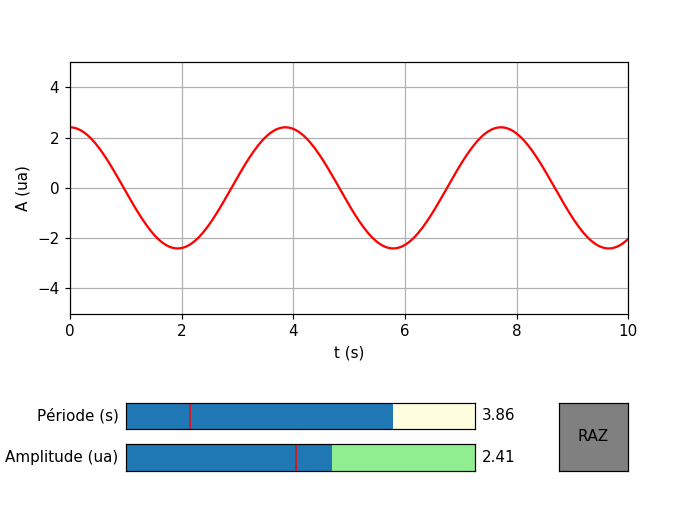

In [4]:
fig, ax = plt.subplots()
plt.xlabel('t (s)')
plt.ylabel('A (ua)')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.4)

T0 = 1 # période en s
tmax = 10
t = np.linspace(0, tmax, 256)
A0 = 2 # amplitude en ua
y = A0*np.cos(2*Pi*t/T0)

courbe, = plt.plot(t, y, color='red') # conserve la référence de la courbe (Artist)
plt.axis([0, 10, -5, 5])

ax_A = plt.axes([0.18, 0.1, 0.5, 0.05], facecolor='lightgreen')
ax_T = plt.axes([0.18, 0.18, 0.5, 0.05], facecolor='lightyellow')

slider_T = mpw.Slider(ax_T, 'Période (s)', 0.1, 5, valinit=T0)
slider_A = mpw.Slider(ax_A, 'Amplitude (ua)', 0.1, 4, valinit=A0)


def maj(val):
    A = slider_A.val
    T = slider_T.val
    courbe.set_ydata(A*np.cos(2*Pi*t/T))
    fig.canvas.draw_idle()
    
slider_T.on_changed(maj)
slider_A.on_changed(maj)

ax_RAZ = plt.axes([0.8, 0.1, 0.1, 0.13])
button_RAZ = mpw.Button(ax_RAZ, 'RAZ', color='gray', hovercolor='0.777')

def raz(event):
    slider_A.reset()
    slider_T.reset()
    
button_RAZ.on_clicked(raz)

plt.show()